In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

For df1:

   - Take a look at the data in df1.
   - Does x increase from time one to time two?
   - Visualize the relationship between x and time.
   - Run a statistical test to further examine the relationship between these features.



In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [31]:
df1.group.value_counts()

a    102
b     98
Name: group, dtype: int64

In [8]:
df1.describe()

,x,time
count,200.000000,200.000000
mean,6.511559,1.500000
std,2.180756,0.501255
min,0.556924,1.000000
25%,4.895169,1.000000
50%,6.507704,1.500000
75%,8.261932,2.000000
max,12.958625,2.000000


In [3]:
df1['time'] = df1['time'].replace(['one', 'two'], [1,2])

In [4]:
df1.head()

,group,x,time
0,a,7.087113,1
1,a,5.164441,1
2,a,6.150206,1
3,a,3.732648,1
4,a,5.181035,1


In [21]:
one = df1.time == 1
df1a = df1[one]
df1a.describe()

,x,time
count,100.000000,100.0
mean,5.726669,1.0
std,1.960576,0.0
min,2.442945,1.0
25%,4.546572,1.0
50%,5.266279,1.0
75%,6.294788,1.0
max,12.958625,1.0


In [32]:
df1a.head()

,group,x,time
0,a,7.087113,1
1,a,5.164441,1
2,a,6.150206,1
3,a,3.732648,1
4,a,5.181035,1


In [22]:
two = df1.time == 2
df1b = df1[two]
df1b.describe()

,x,time
count,100.000000,100.0
mean,7.296448,2.0
std,2.114480,0.0
min,0.556924,2.0
25%,6.904859,2.0
50%,7.891303,2.0
75%,8.608649,2.0
max,10.250676,2.0


In [33]:
df1b.head()

,group,x,time
100,b,8.673649,2
101,a,2.411029,2
102,b,8.986474,2
103,b,8.993807,2
104,b,8.020419,2


In [36]:
groupa = df1.group == 'a'
adf = df1[groupa]
adf.describe()

,x,time
count,102.000000,102.000000
mean,4.768225,1.147059
std,1.282435,0.355914
min,0.556924,1.000000
25%,4.007494,1.000000
50%,4.950127,1.000000
75%,5.540704,1.000000
max,7.598304,2.000000


In [37]:
groupb = df1.group == 'b'
bdf = df1[groupb]
bdf.describe()

,x,time
count,98.000000,98.000000
mean,8.326049,1.867347
std,1.233646,0.340943
min,5.211887,1.000000
25%,7.608626,2.000000
50%,8.307685,2.000000
75%,9.066674,2.000000
max,12.958625,2.000000


***

#### The Range is very similar between time 1 and 2, however the mean and max for time 2 is greather than time one.  With this being the case I would say that there does appear to be an increase between time one and two

***

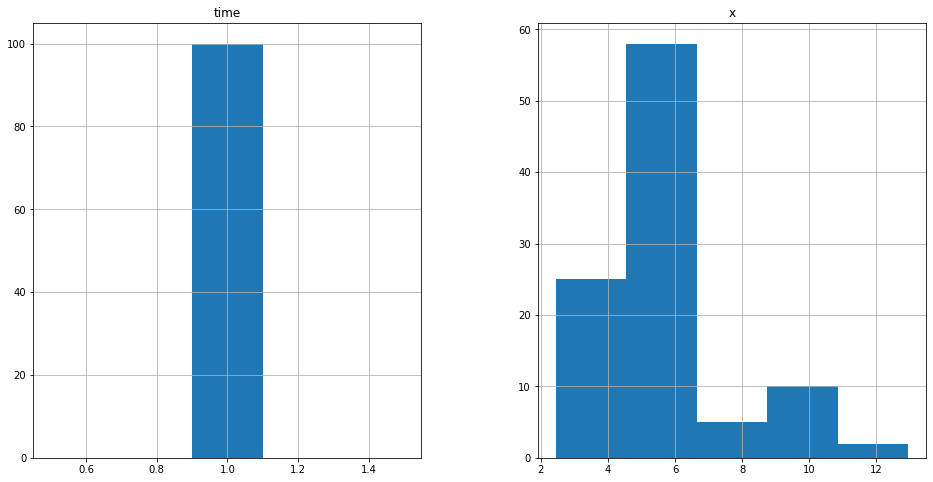

In [24]:
df1a.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

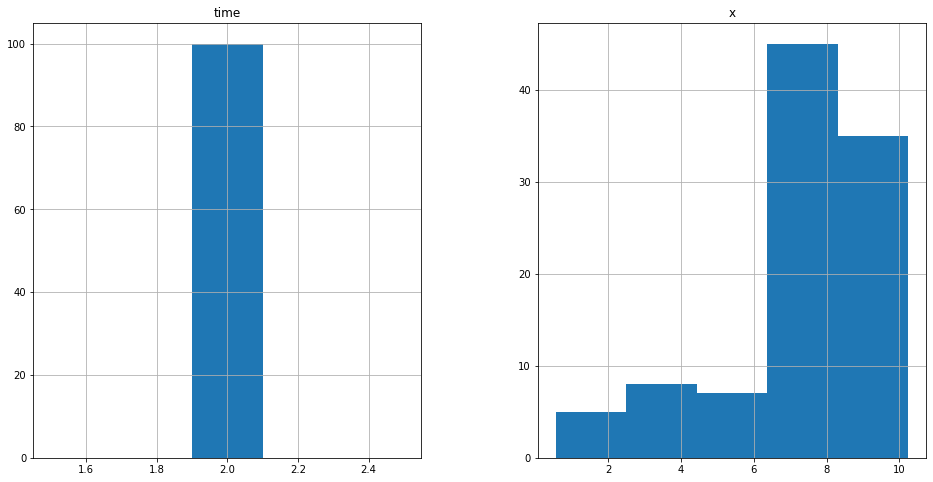

In [25]:
df1b.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

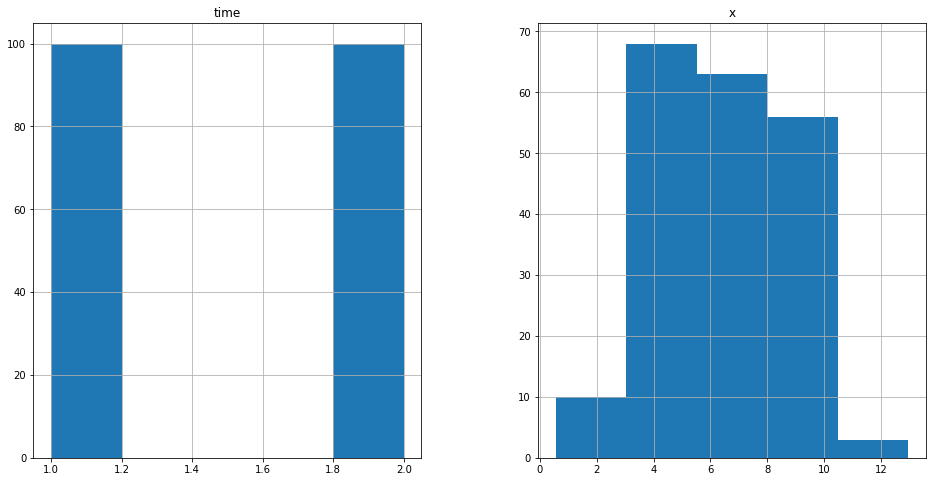

In [27]:
df1.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

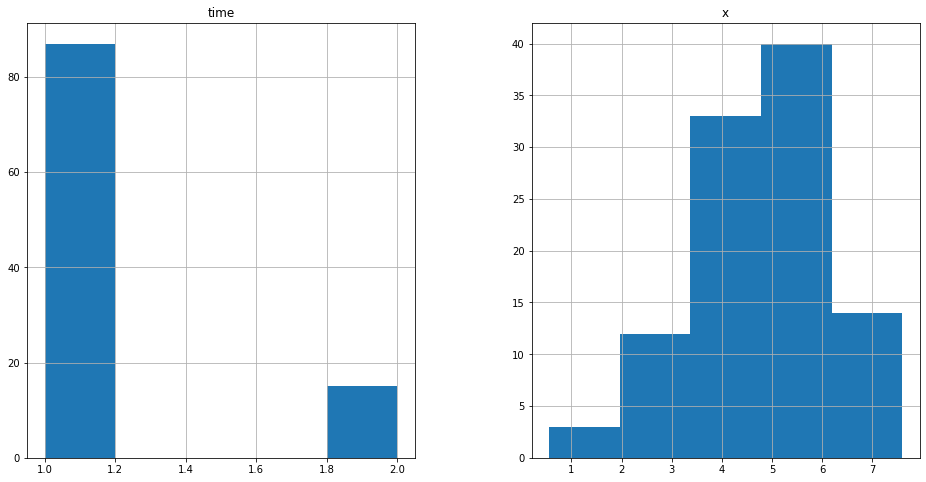

In [38]:
adf.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

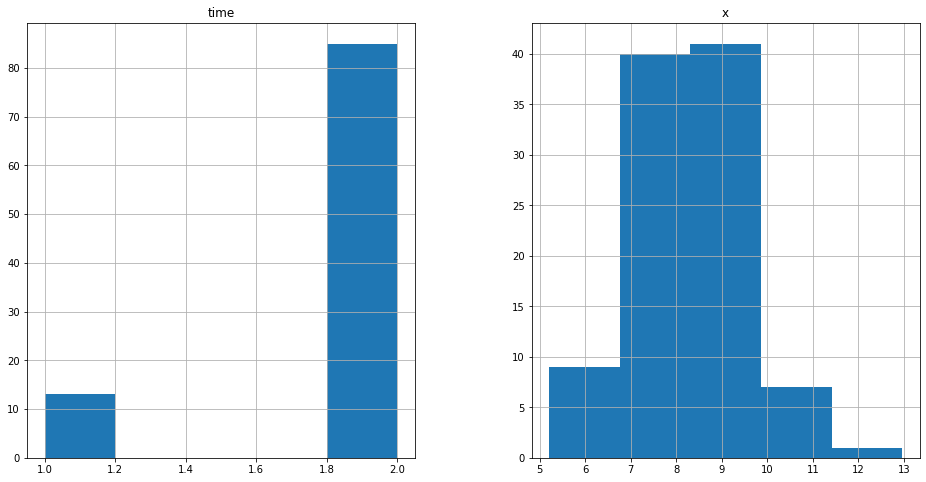

In [39]:
bdf.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

### Statistical Test (2 Sample T-Test)
Hypothesis - Is there a difference in x between time 1 and time 2   
Null - There is no difference between time 1 and time 2   
Alternate - There is a difference between time 1 and time 2   

alpha = 0.05   

In [34]:
time_1 = df1a
time_2 = df1b
test_results = stats.ttest_ind(time_1.x , time_2.x)
test_results

Ttest_indResult(statistic=-5.443902721870272, pvalue=1.5320971681720527e-07)

**We Reject Null, there is a statistically significant difference in x between time 1 and 2**